# Distribution of QN and Q in v1 vs v0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
figpath = '../../plots/'

In [3]:
# load data 
df_QN_cloudy_v1 = pd.read_csv('../../data/processed/df_QN_v1_AO_2021_cloudy.csv')
df_QN_cloudy_v0 = pd.read_csv('../../data/processed/df_QN_v0_AO_2021_cloudy.csv')
df_Q_cloudy_v1 = pd.read_csv('../../data/processed/df_Q_v1_AO_2021_cloudy.csv')
df_Q_cloudy_v0 = pd.read_csv('../../data/processed/df_Q_v0_AO_2021_cloudy.csv')

display(df_QN_cloudy_v1.describe())

,Unnamed: 0,QNC,QNI,QNS,QNR,QNG,QNH,T
count,1.564245e+07,1.564245e+07,1.564245e+07,1.564245e+07,1.564245e+07,1.564245e+07,1.564245e+07,1.564245e+07
mean,2.442547e+07,4.214873e+06,2.052146e+04,8.143165e+02,1.670789e+03,2.340510e+01,1.645112e-06,2.570608e+02
std,1.370702e+07,1.334574e+07,7.027926e+04,2.142556e+03,7.918924e+03,2.760355e+02,1.277664e-05,1.783527e+01
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.086464e+02
25%,1.183568e+07,0.000000e+00,1.027404e-03,1.666150e-03,3.123268e-25,2.055632e-19,2.053312e-27,2.433073e+02
50%,2.499900e+07,0.000000e+00,3.568801e+02,7.503780e+00,7.737048e-08,7.809952e-16,2.346147e-16,2.630801e+02
75%,3.435172e+07,0.000000e+00,9.553095e+03,3.680541e+02,7.914562e+01,7.357083e-05,2.479930e-12,2.720400e+02
max,5.040000e+07,1.255184e+08,1.511863e+07,4.868673e+04,3.563353e+05,1.979844e+04,5.872039e-04,2.812432e+02


QC
QI
QS
QR
QG


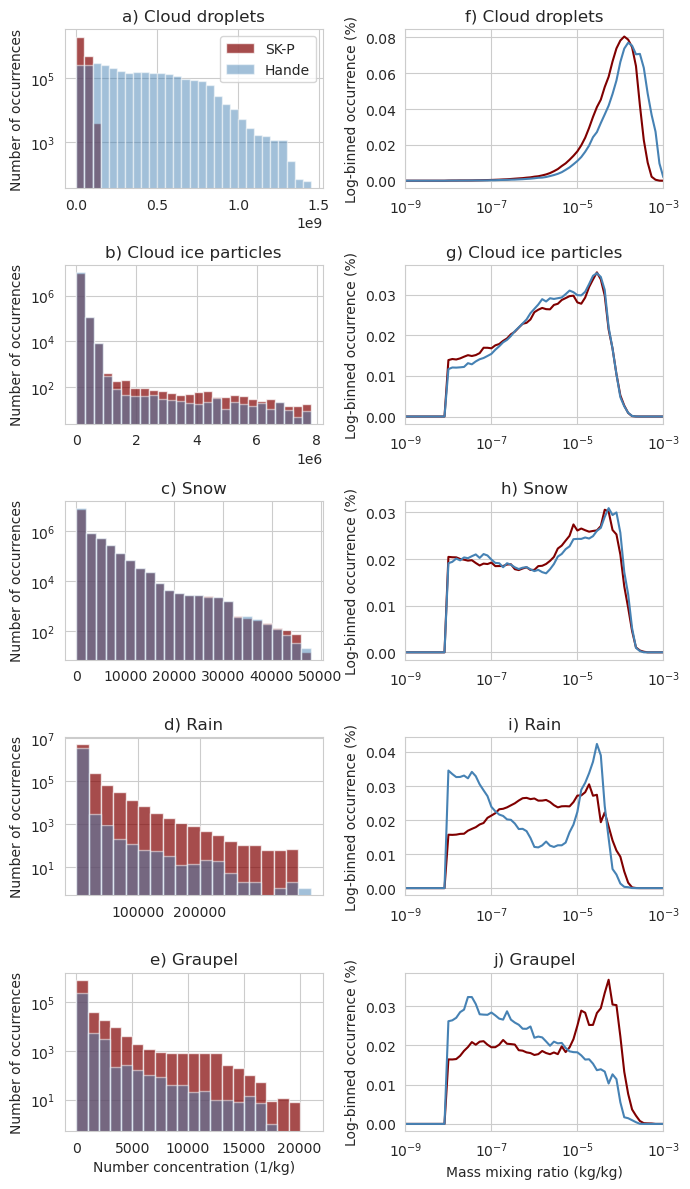

In [25]:
sns.set_style('whitegrid')

bin_range_QNC = np.arange(1, 15e8, 5e7)
bin_range_QNI = np.arange(1, 8e6, 3e5)
bin_range_QNS = np.arange(1, 5e4, 2e3)
bin_range_QNR = np.arange(1, 4e5, 2e4)
bin_range_QNG = np.arange(1, 22000, 1e3)

color_v1 = "maroon"
color_v0 = "steelblue"

label_v1 = "SK-P"
label_v0 = "Hande"


# use a binwidth of 100 for the histogram
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(7, 12))

# Number concentration in first column
ax[0,0].hist(df_QN_cloudy_v1['QNC'], alpha=0.7, bins=bin_range_QNC,
              label=label_v1, color=color_v1)
ax[0,0].hist(df_QN_cloudy_v0['QNC'], alpha=0.5, bins=bin_range_QNC,
              label=label_v0, color=color_v0)
ax[0,0].set_title('a) Cloud droplets')
ax[0,0].legend()

# cloud ice
ax[1,0].hist(df_QN_cloudy_v1['QNI'], alpha=0.7, bins=bin_range_QNI,
              label=label_v1, color=color_v1)
ax[1,0].hist(df_QN_cloudy_v0['QNI'], alpha=0.5, bins=bin_range_QNI,
              label=label_v0, color=color_v0)
ax[1,0].set_title('b) Cloud ice particles')# don't show xticks

# snow flakes
ax[2,0].hist(df_QN_cloudy_v1['QNS'], alpha=0.7, bins=bin_range_QNS,
                label=label_v1, color=color_v1)
ax[2,0].hist(df_QN_cloudy_v0['QNS'], alpha=0.5, bins=bin_range_QNS,
                label=label_v0, color=color_v0)
ax[2,0].set_title('c) Snow')

# Rain drops
ax[3,0].hist(df_QN_cloudy_v1['QNR'], alpha=0.7, bins=bin_range_QNR,
                label=label_v1, color=color_v1)
ax[3,0].hist(df_QN_cloudy_v0['QNR'], alpha=0.5, bins=bin_range_QNR,
                label=label_v0, color=color_v0)
# only show xticklabels 10000 and 20000
ax[3,0].set_xticks([1e5, 2e5])
ax[3,0].set_title('d) Rain')

# graupel
ax[4,0].hist(df_QN_cloudy_v1['QNG'], alpha=0.7, bins=bin_range_QNG,
                label=label_v1, color=color_v1)
ax[4,0].hist(df_QN_cloudy_v0['QNG'], alpha=0.5, bins=bin_range_QNG,
                label=label_v0, color=color_v0)
ax[4,0].set_title('e) Graupel')
ax[4,0].set_xlabel('Number concentration (1/kg)')

for i in range(5):
    ax[i,0].set_yscale('log')
    ax[i,0].set_ylabel('Number of occurrences')

# mass distribution in second column
log_bins = np.logspace(-9, 0, 100)
var_names=["f) Cloud droplets", 'g) Cloud ice particles', 'h) Snow', 'i) Rain', 'j) Graupel']
for i, var in enumerate(df_Q_cloudy_v1.columns[1:-2]):
    print(var)
    binned_var_v1 = np.histogram(df_Q_cloudy_v1[var][df_Q_cloudy_v1[var]>=1e-8], bins=log_bins)[0]
    binned_var_v0 = np.histogram(df_Q_cloudy_v0[var][df_Q_cloudy_v0[var]>=1e-8], bins=log_bins)[0]
    # percentage of all cases
    binned_var_v1 = binned_var_v1 / len(df_Q_cloudy_v1[var][df_Q_cloudy_v1[var]>=1e-8])
    binned_var_v0 = binned_var_v0 / len(df_Q_cloudy_v0[var][df_Q_cloudy_v0[var]>=1e-8])

    ax[i,1].plot(log_bins[:-1], binned_var_v1, label=label_v1, color=color_v1)
    ax[i,1].plot(log_bins[:-1], binned_var_v0, label=label_v0, color=color_v0)
    ax[i,1].set_xlim([1e-9, 1e-3])
    ax[i,1].set_xscale('log')
    ax[i,1].set_title(var_names[i])
    ax[i,1].set_ylabel('Log-binned occurrence (%)')

ax[-1,1].set_xlabel('Mass mixing ratio (kg/kg)')

plt.tight_layout()
plt.savefig(figpath+'QN_Q_distributions_AO_2021.svg', dpi=300, bbox_inches='tight')
plt.show()